In [1]:
# import packages
import warnings
from matplotlib import pyplot as plt

from qdl_klayout_extension.core.shapes import SimpleRectangle
from qdl_klayout_extension.core.coordinates import Coordinates
from qdl_klayout_extension.core.layout import Layout
from qdl_klayout_extension.visualize import plot_polygon

warnings.filterwarnings("ignore")


In [2]:
"""
Create a layout.
This package uses a default database unit defined in "constants" as DBU_UM, which defaults to 0.001.
All defined objects in this package will automatically use the DBU_UM provided in "constants".
If you want to use a different one, update it directly before creating any new objects.
"""
layout = Layout()

"""
Create a layer. For this simple case we will only use one layer, with index 1 and datatype 0.
Traditionally, KLayout uses datatype 0 for regular shapes and datatype 1 for cutouts,
but you can define your own datatypes to represent other types of shapes or to differentiate between different variations of the same shape.
"""
layer_idx = 1
layer = layout.layer(layer_idx, 0)

In [3]:
"""
Create a cell with a name of your choice.
Usually, you create a shape (e.g. polygon) once, and then you put it in a cell,
and you repeat it as many times as needs, as long as you are not doing a parameter sweep.
"""
base_cell = layout.create_cell('base')

Coords: [(<Quantity(0.0, 'micrometer')>, <Quantity(5.0, 'micrometer')>), (<Quantity(10.0, 'micrometer')>, <Quantity(5.0, 'micrometer')>), (<Quantity(10.0, 'micrometer')>, <Quantity(35.0, 'micrometer')>), (<Quantity(0.0, 'micrometer')>, <Quantity(35.0, 'micrometer')>)] 

Centroid: (<Quantity(5.0, 'micrometer')>, <Quantity(20.0, 'micrometer')>) 

Edge Centers: [(<Quantity(5.0, 'micrometer')>, <Quantity(5.0, 'micrometer')>), (<Quantity(10.0, 'micrometer')>, <Quantity(20.0, 'micrometer')>), (<Quantity(5.0, 'micrometer')>, <Quantity(35.0, 'micrometer')>), (<Quantity(0.0, 'micrometer')>, <Quantity(20.0, 'micrometer')>)] 

Edge Lines: [Line((<Quantity(0.0, 'micrometer')>, <Quantity(5.0, 'micrometer')>), (<Quantity(10.0, 'micrometer')>, <Quantity(5.0, 'micrometer')>)), Line((<Quantity(10.0, 'micrometer')>, <Quantity(5.0, 'micrometer')>), (<Quantity(10.0, 'micrometer')>, <Quantity(35.0, 'micrometer')>)), Line((<Quantity(10.0, 'micrometer')>, <Quantity(35.0, 'micrometer')>), (<Quantity(0.0, 'mic

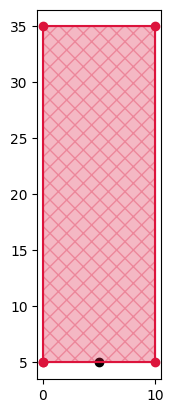

In [4]:
"""
Create a shape. Here we are creating a rectangle.
The rectangle is defined by a width (x-axis) and length (y-axis).
You can rotate the rectangle with the input angle.
We can define it with two different reference points in mind.
One is the centroid, and the second is an center of an edge of our choice.
Here we choose to define it by the center of the bottom edge.
This definition will later help to create complex shape combinations that are adjacent to each other,
and retrieving the edge center point from the shape.edge_centers property.

Any shape that inherits from the SimplePolygon class has the following properties you can retrieve easily!
coords -> coordinates of each point, as a CoordinatesList object.
centroid -> The center of the structure
ref_point -> The reference point of the structure (where the relative 0,0 is).  Defaults to centroid, but for the asymmetric cross these two don't overlap.
edge_centers -> The centers points between the coords, as a CoordinatesList object.
edge_lines -> a list of Line objects, defined by a tuple of Coordinates objects.
edge_lengths -> A list of lengths of each edge.
edge_angles -> A list of global angles.
point_angles -> A list of relative angles between two adjacent edges.
"""

ref_point = Coordinates(5, 5)
width = 10
length = 30
angle = 0
rect = SimpleRectangle.from_edge(width, length, angle, ref_point)
print('Coords:', rect.coords, '\n')
print('Centroid:', rect.centroid, '\n')
print('Edge Centers:', rect.edge_centers, '\n')
print('Edge Lines:', rect.edge_lines, '\n')
print('Edge Lengths:', rect.edge_lengths, '\n')
print('Edge Angles:', rect.edge_angles.to('deg'), '\n')
print('Point Angles:', rect.point_angles.to('deg'), '\n')

"""
You can easily plot a polygon with the visualization function plot_polygon.
"""
plt.scatter(ref_point.x_uu, ref_point.y_uu, color='k')
plot_polygon(rect)

In [5]:
"""
Use the added method easy_insert to easily insert multiple shapes in a cell in a specific layer.
Alternatively, you need to use the Cell.cell.shapes(layer).insert(element) method, where element needs to be a klayout element.
"""
base_cell.easy_insert(layer, [rect])
# base_cell.shapes(layer).insert(cross.klayout_simple_polygon)


In [6]:
"""
To save this in a gds file, we simple call the write function from the layout
"""
layout.write('example_1_rectangle.gds')

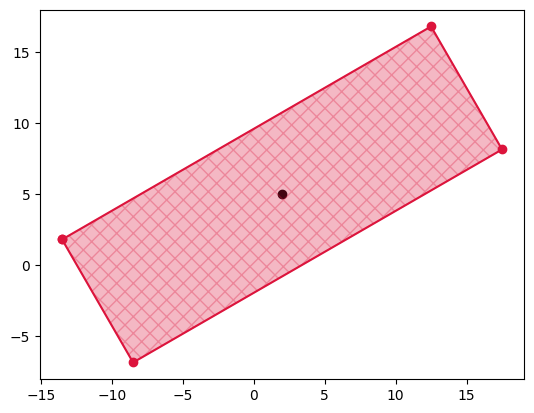

In [7]:
"""
Here is another example of a rotated rectangle, defined with via the centroid.
"""

ref_point = Coordinates(2, 5)
rect = SimpleRectangle.from_centroid(10, 30, -60, ref_point)

plt.scatter(ref_point.x_uu, ref_point.y_uu, color='k')
plot_polygon(rect)